In [35]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [36]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [37]:
# Read and print the Ride Data
ride_df = pd.read_csv("ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [38]:
# Read and print the City Data
city_df = pd.read_csv("city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [39]:
# Combine the data into a single dataset
combined_data = pd.merge(city_df, ride_df[["date", "fare", "ride_id", "city"]], how="outer", on="city")
combined_data = combined_data[['city','date','fare','ride_id', 'driver_count', 'type']]

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [41]:
# Average Fare ($) Per City
combined_data = combined_data.groupby(['city', 'type'])
combined_data = pd.DataFrame(round(combined_data.mean(),2))
combined_data = combined_data.reset_index()
combined_data.head()


,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,24.64,5.359336e+12,12.0
1,Barajasview,Urban,25.33,4.676968e+12,26.0
2,Barronchester,Suburban,36.42,4.460796e+12,11.0
3,Bethanyland,Suburban,32.96,5.842550e+12,22.0
4,Bradshawfurt,Rural,40.06,3.735294e+12,7.0


In [42]:
# Total Number of Rides Per City
total_rides = ride_df.groupby('city')['ride_id'].count()
total_rides = pd.DataFrame(total_rides)
total_rides = total_rides.reset_index()
total_rides = total_rides.rename(columns={'ride_id':'total_rides'})
total_rides.head()


,city,total_rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [43]:
# Total Number of Drivers Per City ( ----- mismatched cities with driver counts ------)
combined_data = pd.merge(combined_data, total_rides, on='city')
total_drivers = combined_data.groupby('city')['driver_count'].mean()
total_drivers = pd.DataFrame(total_drivers)
total_drivers = total_drivers.reset_index()
total_drivers.head()

,city,driver_count
0,Amandaburgh,12.0
1,Barajasview,26.0
2,Barronchester,11.0
3,Bethanyland,22.0
4,Bradshawfurt,7.0


In [44]:
# City Type (Urban, Suburban, Rural)
city_types_count = city_df.set_index('city')['type']
city_types_count.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [45]:
# % of Total Fares by City Type ( ------- need to change the name of the second avg_fare column to percent_fare ------ )
total_fares = combined_data['fare'].sum()
percent_fares = (combined_data['fare']/total_fares)*100
percent_fares_df = pd.concat([total_drivers,percent_fares], axis=1)
percent_fares_df.head()


,city,driver_count,fare
0,Amandaburgh,12.0,0.736199
1,Barajasview,26.0,0.756815
2,Barronchester,11.0,1.088165
3,Bethanyland,22.0,0.984786
4,Bradshawfurt,7.0,1.196921


In [46]:
# % of Total Rides by City Type

total_rides = ride_df.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns={'ride_id': 'total_rides'})

total_rides.head()

,city,total_rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [47]:
# % of Total Drivers by City Type

merged_df = pd.merge(pd.merge(pd.merge(combined_data, total_rides, on='city'), total_drivers, on='city'), city_df, on='city')
merged_df = merged_df.drop(columns=['total_rides_y', 'driver_count_y', 'type_y'])
merged_df.head()

,city,type_x,fare,ride_id,driver_count_x,total_rides_x,driver_count
0,Amandaburgh,Urban,24.64,5.359336e+12,12.0,18,12
1,Barajasview,Urban,25.33,4.676968e+12,26.0,22,26
2,Barronchester,Suburban,36.42,4.460796e+12,11.0,16,11
3,Bethanyland,Suburban,32.96,5.842550e+12,22.0,18,22
4,Bradshawfurt,Rural,40.06,3.735294e+12,7.0,10,7


## Bubble Plot of Ride Sharing Data

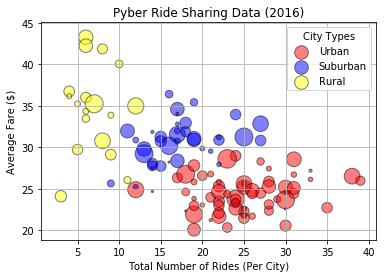

In [48]:
# Obtain the x and y coordinates for each of the three city types
urban_rides = merged_df.loc[merged_df['type_x'] == 'Urban']
suburb_rides = merged_df.loc[merged_df['type_x'] == 'Suburban']
rural_rides = merged_df.loc[merged_df['type_x'] == 'Rural']

# plot the bubble bubble plot and save it
a = urban_rides.plot(kind='scatter',x='total_rides_x', y='fare', color='red', s=merged_df['driver_count_x']*5, label = 'Urban', alpha = 0.5, edgecolor = "black", linewidths = 1)    
b = suburb_rides.plot(kind='scatter', x='total_rides_x', y='fare', color='blue',s=merged_df['driver_count_x']*5, label = 'Suburban', alpha = 0.5, edgecolor = "black", linewidths = 1, ax=a)    
c = rural_rides.plot(kind='scatter', x='total_rides_x', y='fare', color='yellow', s=merged_df['driver_count_x']*5, label = 'Rural', alpha = 0.5, edgecolor = "black", linewidths = 1, ax=b)
plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')


In [103]:
# Show plot
plt.show()

Text(0.5,1,'% of Total Fares by City Type')

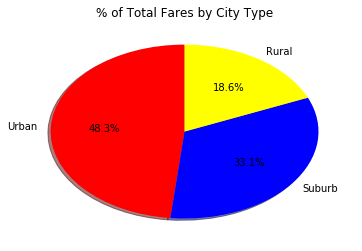

In [86]:
# Calculate Type Percents
sum_of_fares = combined_data["fare"].sum()
urban_fares = urban_rides['fare'].sum()
urban_percent = (urban_fares/sum_of_fares)*100

suburb_fares = suburb_rides['fare'].sum()
suburb_percent = (suburb_fares/sum_of_fares)*100

rural_fares = rural_rides['fare'].sum()
rural_percent = (rural_fares/sum_of_fares)*100

# Build Pie Chart
labels = 'Urban', 'Suburb', 'Rural'
sizes = [urban_percent, suburb_percent, rural_percent] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = ['red', 'blue', 'yellow'])
plt.title("% of Total Fares by City Type")


In [99]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

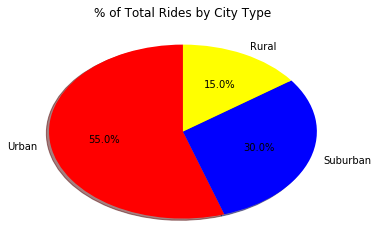

In [109]:
# Calculate Ride Percents
sum_of_rides = merged_df["total_rides_x"].count()
urban_rides_count = urban_rides.count()
urban_rides_percent = (urban_rides_count/sum_of_rides)*100
urban_rides_int = urban_rides_percent.iloc[[3]]

suburb_rides_count = suburb_rides.count()
suburb_rides_percent = (suburb_rides_count/sum_of_rides)*100
suburb_rides_int = suburb_rides_percent.iloc[[3]]

rural_rides_count = rural_rides.count()
rural_rides_percent = (rural_rides_count/sum_of_rides)*100
rural_rides_int = rural_rides_percent.iloc[[3]]

# Build Pie Chart
labels = 'Urban', 'Suburban', 'Rural'
sizes = [urban_rides_int, suburb_rides_int, rural_rides_int]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = ['red', 'blue', 'yellow'])
plt.title("% of Total Rides by City Type")


In [110]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

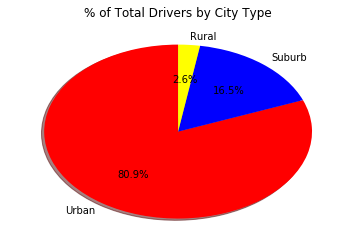

In [111]:
# Calculate Driver Percents
sum_of_drivers = merged_df['driver_count_x'].sum()
urban_drivers = merged_df.loc[merged_df['type_x'] == 'Urban']
urban_drivers_sum = urban_drivers['driver_count_x'].sum()
urban_drivers_percent = (urban_drivers_sum/sum_of_drivers)*100

suburb_drivers = merged_df.loc[merged_df['type_x'] == 'Suburban']
suburb_drivers_sum = suburb_drivers['driver_count_x'].sum()
suburb_drivers_percent = (suburb_drivers_sum/sum_of_drivers)*100

rural_drivers = merged_df.loc[merged_df['type_x'] == 'Rural']
rural_drivers_sum = rural_drivers['driver_count_x'].sum()
rural_drivers_percent = (rural_drivers_sum/sum_of_drivers)*100

# Build Pie Chart
labels = 'Urban', 'Suburb', 'Rural'
sizes = [urban_drivers_percent, suburb_drivers_percent, rural_drivers_percent]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = ["red", "blue", "yellow"])
plt.title("% of Total Drivers by City Type")


In [112]:
# Show Figure
plt.show()